In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv("0709.csv")
df

,strain,number,dots,cells,0,1,2,3
0,172,1,11,67,56,10,0,1
1,172,1,8,45,37,4,1,3
2,172,1,5,54,49,5,0,0
3,172,2,11,84,73,9,2,0
4,172,2,7,82,75,4,2,1
5,172,2,4,55,51,4,0,0
6,172,3,5,52,47,4,1,0
7,172,3,4,53,49,2,2,0
8,172,3,4,56,52,2,2,0
9,399,1,0,51,51,0,0,0


In [3]:
df['per_1'] = df['1'] / df['dots'] * 100
df['per_2'] = df['2'] / df['dots'] * 100
df['per_3'] = df['3'] / df['dots'] * 100

In [4]:
df

,strain,number,dots,cells,0,1,2,3,per_1,per_2,per_3
0,172,1,11,67,56,10,0,1,90.909091,0.000000,9.090909
1,172,1,8,45,37,4,1,3,50.000000,12.500000,37.500000
2,172,1,5,54,49,5,0,0,100.000000,0.000000,0.000000
3,172,2,11,84,73,9,2,0,81.818182,18.181818,0.000000
4,172,2,7,82,75,4,2,1,57.142857,28.571429,14.285714
5,172,2,4,55,51,4,0,0,100.000000,0.000000,0.000000
6,172,3,5,52,47,4,1,0,80.000000,20.000000,0.000000
7,172,3,4,53,49,2,2,0,50.000000,50.000000,0.000000
8,172,3,4,56,52,2,2,0,50.000000,50.000000,0.000000
9,399,1,0,51,51,0,0,0,NaN,NaN,NaN


In [5]:
df_number = df.groupby(["strain", "number"], as_index=False).mean()
df_number = df_number[df_number['strain']==172]
SE_mean = df_number.groupby('strain')[['per_1', 'per_2', 'per_3']].mean().values
SE_mean

array([[73.31890332, 19.91702742,  6.76406926]])

In [6]:
df_number

,strain,number,dots,cells,0,1,2,3,per_1,per_2,per_3
0,172,1,8.000000,55.333333,47.333333,6.333333,0.333333,1.333333,80.30303,4.166667,15.530303
1,172,2,7.333333,73.666667,66.333333,5.666667,1.333333,0.333333,79.65368,15.584416,4.761905
2,172,3,4.333333,53.666667,49.333333,2.666667,1.666667,0.000000,60.00000,40.000000,0.000000


In [7]:
SE_sem = df_number.groupby('strain')[['per_1', 'per_2', 'per_3']].std().values / np.sqrt(3)
SE_sem

array([[ 6.66208934, 10.5685948 ,  4.59362149]])

In [8]:
df_number = df_number[['per_1', 'per_2', 'per_3']]
df_number

,per_1,per_2,per_3
0,80.30303,4.166667,15.530303
1,79.65368,15.584416,4.761905
2,60.00000,40.000000,0.000000


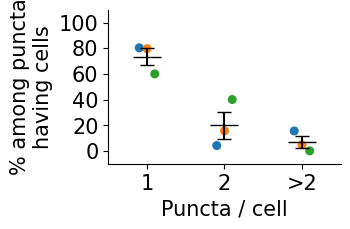

In [9]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
fontsize = 15
fig, ax = plt.subplots(figsize = (3, 2), dpi=100)
for idx, column in enumerate(df_number.columns):
    y = df_number[column].values
    x = [idx + 0.1*x for x in range(-1, 2)]
    ax.scatter(x, y, s=30, c=colors)

ax.errorbar(x=list(range(len(df_number))), y=SE_mean[0], yerr=SE_sem,
            capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim(-0.5, 2.5)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["1", "2", ">2"], fontsize=fontsize)
ax.set_xlabel("Puncta / cell", fontsize=fontsize)

ax.set_ylim(-10, 110)
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_yticklabels(["0", "20", "40", "60", "80", "100"], fontsize=fontsize)
ax.set_ylabel("% among puncta\nhaving cells", fontsize=fontsize)

fig.savefig("output.jpg", bbox_inches="tight")
plt.show()